# Parsed EDA

## Read feast

In [2]:
import pandas as pd

df = pd.read_json('/Users/apoltavets/anna-apps/annalyticai/labor-market/output/4_feast/fact_jobs/20250922_dedup.json', lines=True)
print(df.shape)

(6757, 39)


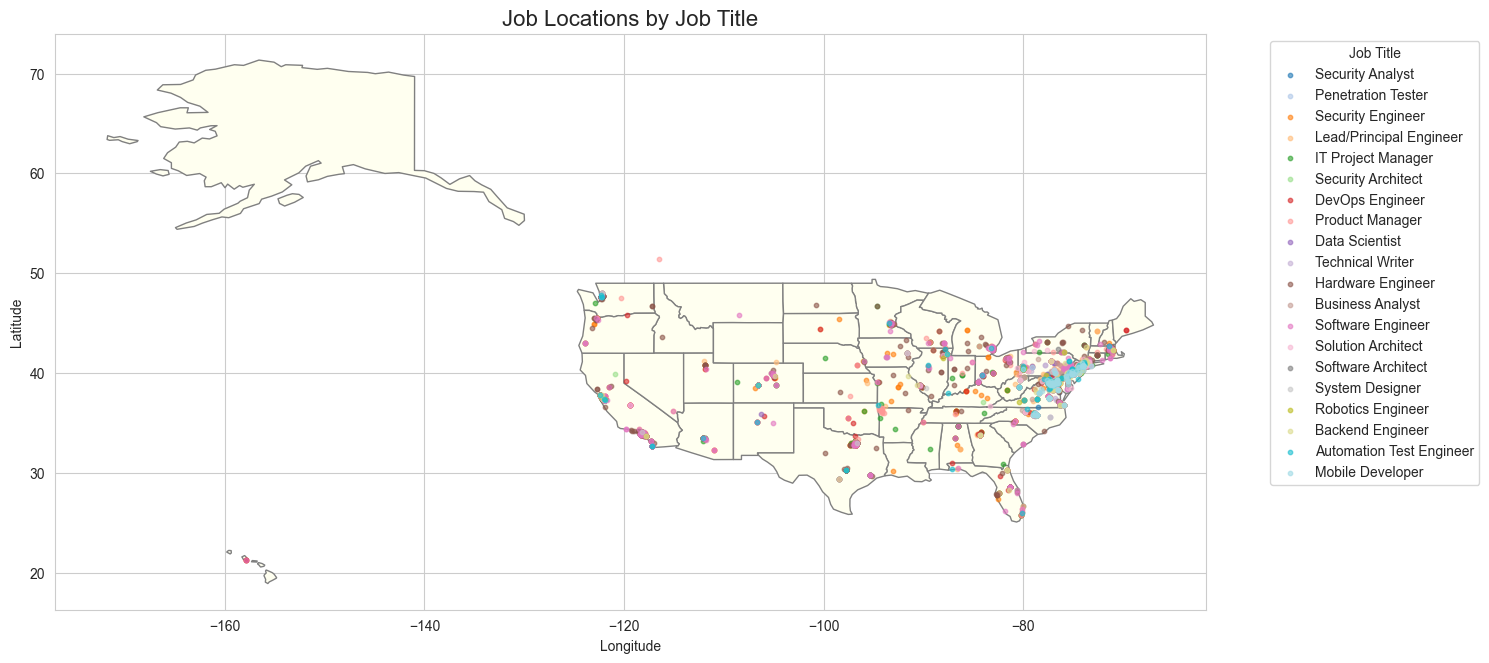

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

geometry = [Point(xy) for xy in zip(df['job_longitude'], df['job_latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Load the world map from the manually downloaded file
world = gpd.read_file('../data/110m_cultural/ne_110m_admin_1_states_provinces.shp')  # Update with the correct path

# Plot the map and the job locations
plt.figure(figsize=(15, 10))
world.plot(ax=plt.gca(), color='ivory', edgecolor='gray')  # Set background 
# Generate a colormap based on the number of unique job titles
unique_titles = geo_df['job_title'].unique()
colors = plt.cm.tab20.colors[:len(unique_titles)]  # Use a colormap with enough distinct colors
color_map = dict(zip(unique_titles, colors))

for title, color in color_map.items():
    subset = geo_df[geo_df['job_title'] == title]
    subset.plot(ax=plt.gca(), markersize=10, color=color, alpha=0.6, label=title)

# Add legend and title
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Job Locations by Job Title', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

In [40]:
# Group by 'job_state' and 'job_title', count occurrences, and get the top 3 for each state
top_titles_per_state = (
    df.groupby(['job_state', 'job_title'])
    .size()
    .reset_index(name='count')
    .sort_values(['job_state', 'count'], ascending=[True, False])
    .groupby('job_state')
    .head(3)
)

# Display the result
top_titles_per_state

,job_state,job_title,count
3,Alabama,IT Project Manager,5
2,Alabama,Hardware Engineer,3
8,Alabama,Security Engineer,3
10,Alaska,ML Engineer,2
11,Alaska,QA Lead,1
...,...,...,...
653,West Virginia,Security Analyst,6
669,Wisconsin,Product Manager,5
672,Wisconsin,Software Engineer,4
665,Wisconsin,Hardware Engineer,3


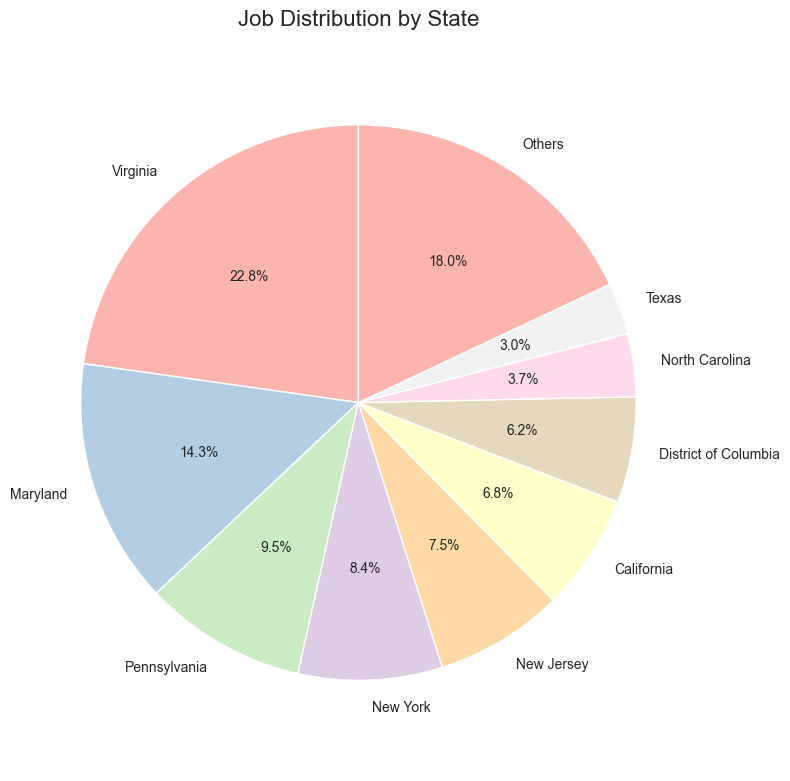

In [41]:
## Job distribution by state
import matplotlib.pyplot as plt

state_agg = df.drop_duplicates(subset='job_id')['job_state'].value_counts().sort_values(ascending=False)
# Get top 10 states and calculate "Others"
top_10_states = state_agg.head(9)
others_sum = state_agg[9:].sum()
state_data = pd.concat([top_10_states, pd.Series({'Others': others_sum})])

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(state_data,
        labels=state_data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Pastel1.colors)
plt.title('Job Distribution by State', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

/var/folders/x8/ps_xddr95734lgrb6gqpr7g80000gp/T/ipykernel_68840/3055155498.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=experience_df, x='experience_level', y='count', palette='viridis')


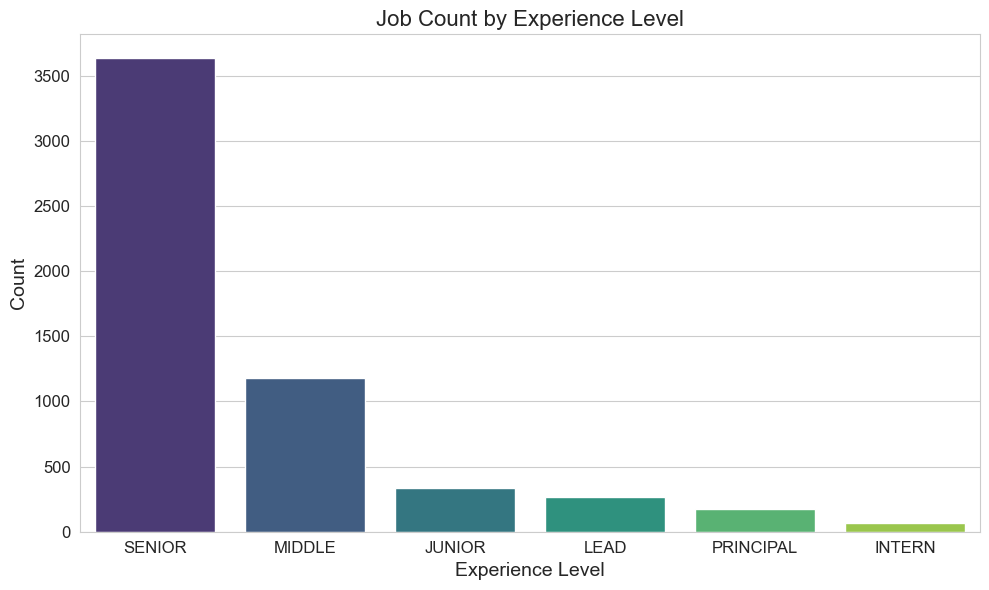

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each experience level
experience_counts = df['experience_level'].value_counts()

# Convert to DataFrame for Seaborn
experience_df = experience_counts.reset_index()
experience_df.columns = ['experience_level', 'count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=experience_df, x='experience_level', y='count', palette='viridis')

# Add labels and title
plt.title('Job Count by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [3]:
l = df[['job_id', 'required_languages']].explode('required_languages')
l['lang'] = l['required_languages'].apply(lambda x: x.lower() if isinstance(x, str) and x != None else '')
sl = pd.read_csv('lang.csv')[['lang', 'standard_lang']]
l = l.merge(sl, how='inner', on='lang')
l = l[l['standard_lang'].notna()]
l = l.groupby('job_id')['standard_lang'].apply(lambda x: sorted(set(x))).reset_index()
l = l.explode('standard_lang')

In [12]:
lang_agg = l['standard_lang'].value_counts().head(10).reset_index()
lang_agg.columns = ['programming_language', 'count']

/var/folders/x8/ps_xddr95734lgrb6gqpr7g80000gp/T/ipykernel_88407/2464193148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lang_agg, x='count', y='programming_language', palette='viridis')


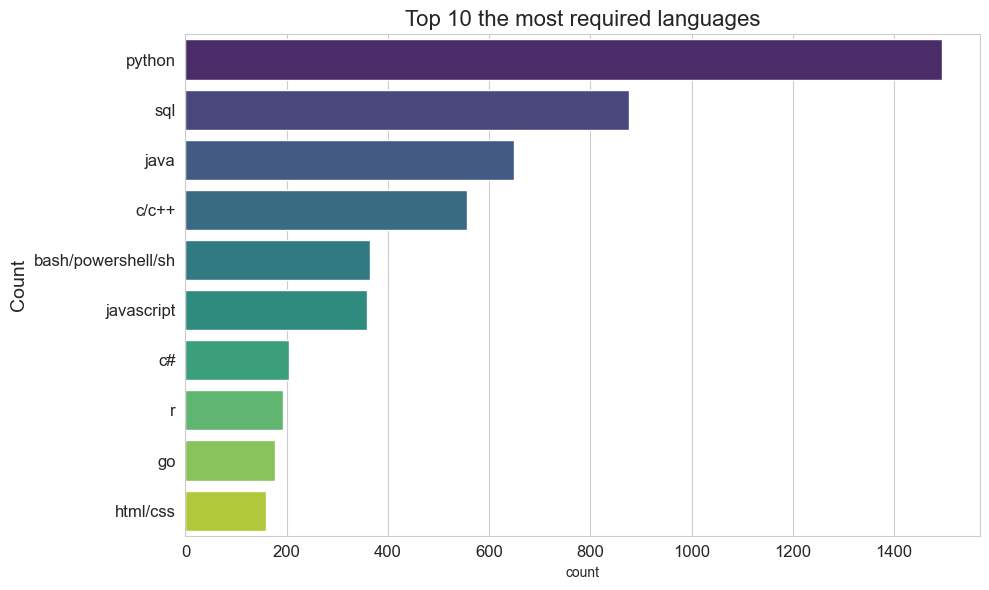

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=lang_agg, x='count', y='programming_language', palette='viridis')

# Add labels and title
plt.title('Top 10 the most required languages', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()